<h1 style="font-family: 'Arial Rounded MT Bold', Arial, sans-serif; 
           color: #0260beff; 
           text-align: center; 
           font-size: 60px;">
<b>Telecom Churn Analysis</b>
</h1>


# <u>***Importing Required Libraries***</u>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.reset_option('all')

df = pd.read_csv('CustomerChurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# <u>***Data Inspection***</u>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> ### ***We can see that the data type of Column TotalCharges is "object" which was incorrect it must be "int64" that means there are some issue , lets check***

# <u>***Data Cleaning***</u>

 ### ◉ *Replacing blanks with 0 as tenure is 0 and no total charges are recorded :*

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### ◉ *Checking Null Values :*

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### ◉ *Check that data frame does not contain exact same rows :*

In [8]:
df.duplicated().sum()

np.int64(0)

### ◉ *Checks duplicates in customerID :*

In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

### ◉ *#Changing value type of SeniorCitizen colum to (1,0) to (yes,no):*

In [10]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [11]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# <u>***Visualizing Churn Data***</u>

### ◉ *Count of Churned Customer :*

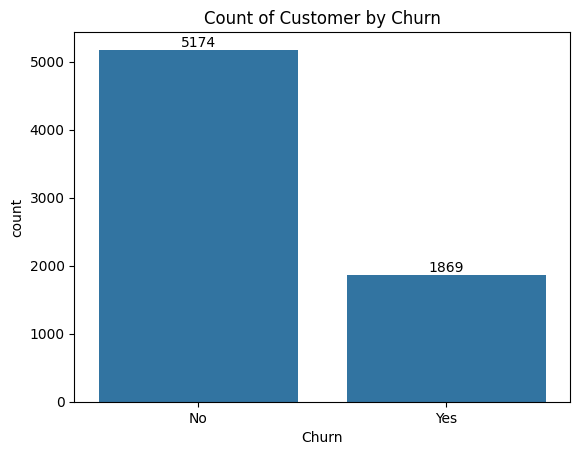

In [12]:
ax = sns.countplot(x='Churn' , data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

### ◉ *Churn Data in Percentage :*

In [13]:
gb = df.groupby('Churn').agg({'Churn':'count'})
gb


,Churn
Churn,
No,5174
Yes,1869


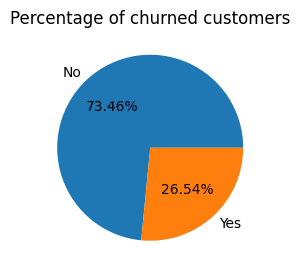

In [14]:
plt.figure(figsize= (3,4))
plt.pie(gb['Churn'], labels= gb.index ,autopct = "%1.2f%%")
plt.title('Percentage of churned customers')
plt.show() 

> ### ***From the given pie chart we can conclude that 26.54% of our customers have churned out , Now lets find the reason behind it.***

### ◉ *Churned Customer Based on Gender :*

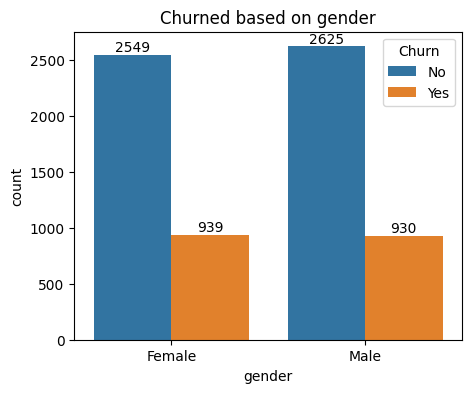

In [15]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x="gender",data=df , hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned based on gender")
plt.show()

### ◉ *Count of Senior Citizens in overall Customers :*

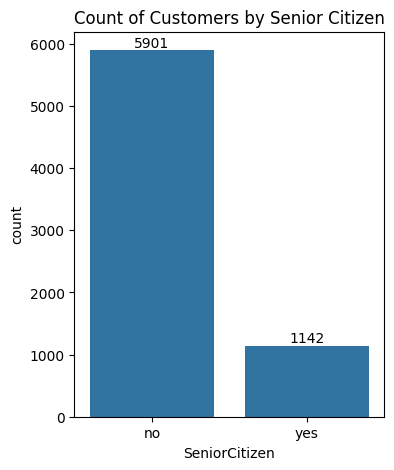

In [16]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

### ◉ *Distribution of churned customers among Senior and Non-Senior Citizens :*

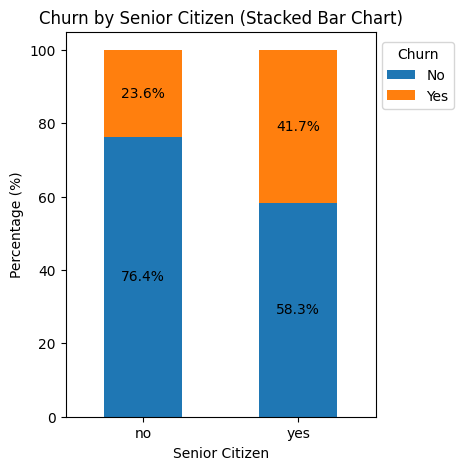

In [17]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
fig , ax = plt.subplots(figsize=(4,5))
total_counts.plot(kind='bar',stacked=True,ax=ax,color=['#1f77b4','#ff7f0e'])
for p in ax.patches :
    width , height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2,y+height/2,f'{height:.1f}%', ha='center',va='center')
plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn',loc=(1.02,0.8))
plt.show()

### ◉ *Distribution of churned customers by tenure :*

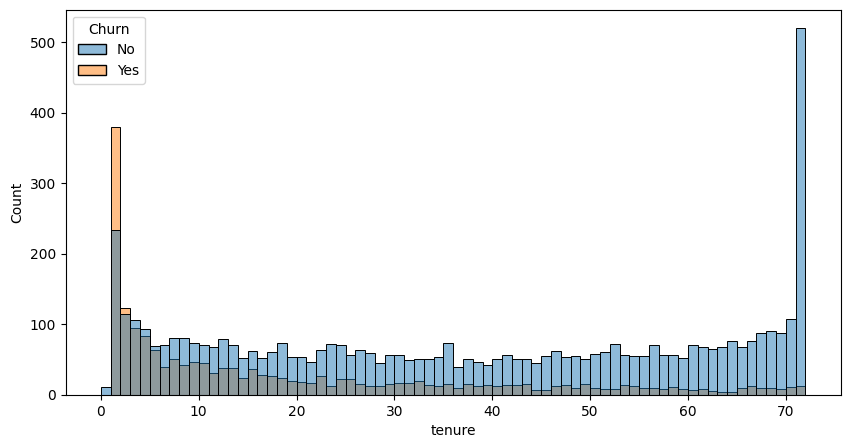

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(x='tenure',data=df , bins=72, hue='Churn')
plt.show()

> ### ***People who uses our servies for a long time have stayed and the people who have used our services for 1 or 2 months have churned.***

### ◉ *Churned Customer based on Contract :*

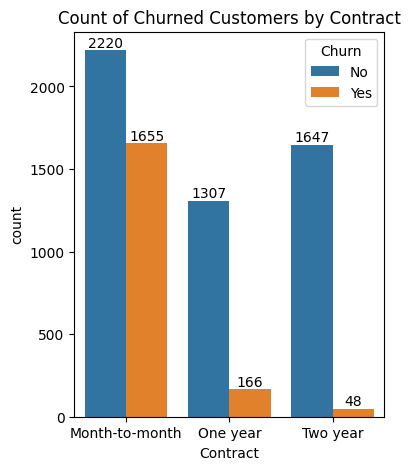

In [19]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x="Contract",data=df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churned Customers by Contract")
plt.show()

> ### ***People who have month to month contract are more likely to churn rather than those who have 1 or 2 years of contract.***

### ◉ *Listing all Columns of Data Set :*

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

> ### ***So we can say there is total 9 ( 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') Services which was provided by us now we check that the services are the reasons behind customers churned?.***

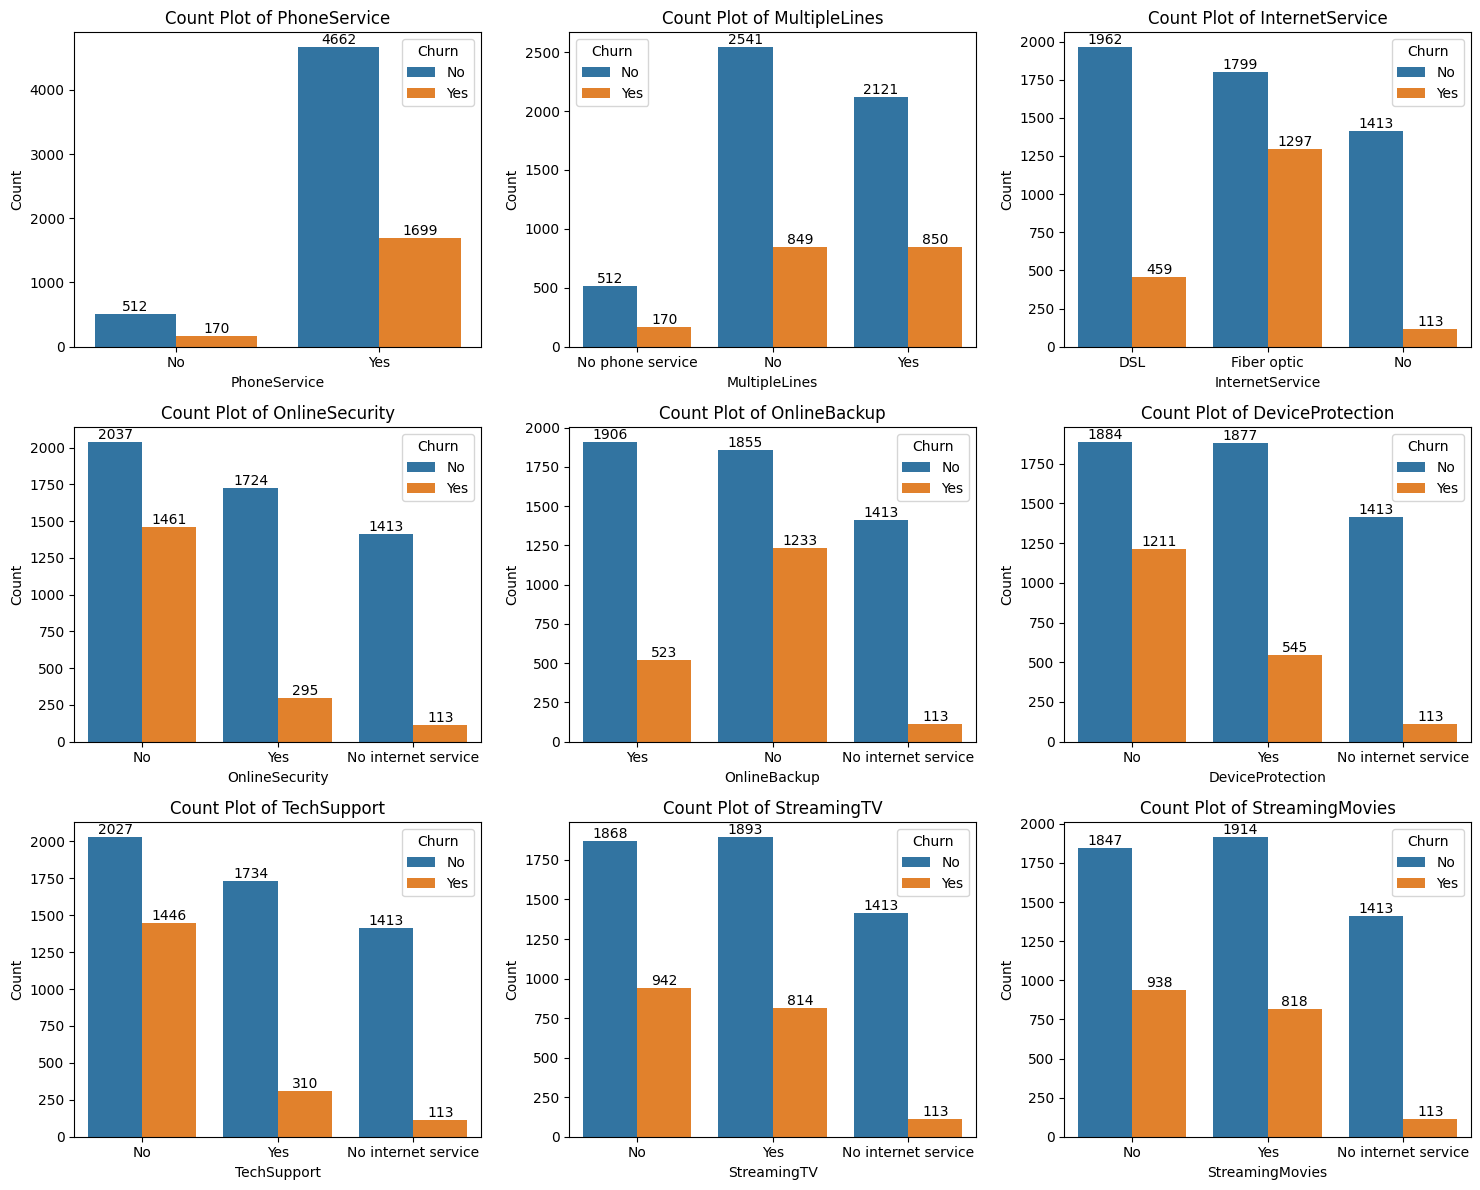

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3 # number of columns of subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols #Calculate number of rows which needed in sublplot
fig , axes = plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4)) 
axes = axes.flatten()
for i , col in enumerate(columns):
    ax=sns.countplot(x=col , data = df , ax=axes[i], hue=df["Churn"])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

> ### ***Customers without additional services (like OnlineSecurity, TechSupport, and DeviceProtection) show higher churn rates compared to those who subscribed.***

> ### ***Fiber optic internet users churn more than DSL users, suggesting service type strongly influences retention.***

> ### ***Having PhoneService or MultipleLines doesn’t drastically reduce churn — churn remains notable in both cases.***

> ### ***Entertainment services like StreamingTV and StreamingMovies also show higher churn among non-users compared to users.***

> ### ***Overall, customers who don’t adopt extra services are more likely to churn, indicating that bundled services improve retention.***

### ◉ *Churned Customer by Payment Menthod :*

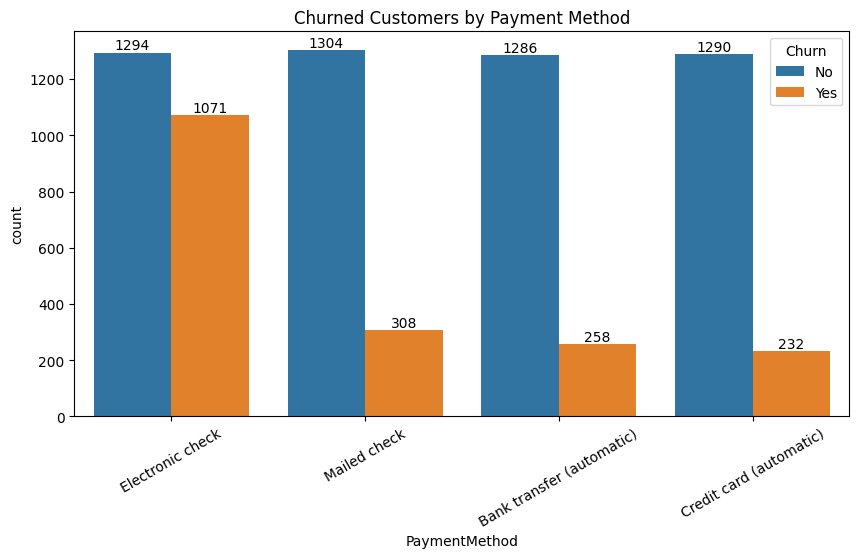

In [22]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="PaymentMethod",data=df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=30)
plt.show()

> ## ***Customer is likely to churn when he is using electronic check as payment method.***

<hr>

### Developed by  : **Siddhesh Parwade**  

[![GitHub](https://img.shields.io/badge/GitHub-SiddheshParwade-181717?logo=github&logoColor=white)](https://github.com/SiddheshParwade)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-SiddheshParwade-0A66C2?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/siddheshparwade/)  
[![Email](https://img.shields.io/badge/Email-siddheshparwade%40gmail.com-D14836?logo=gmail&logoColor=white)](mailto:siddheshparwade@gmail.com)  